<a href="https://colab.research.google.com/github/akashsharma-2002/Image_Manipulation/blob/main/Image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMAGE MANIPULATION


#### IMPORTING LIBRARIES REQUIRED

In [22]:
import cv2
from google.colab.patches import cv2_imshow


In [33]:
def main():
  img=cv2.imread('puff.jpeg')
  cv2_imshow(img)



A simple code for opening up an image

###ORIGNAL IMAGE

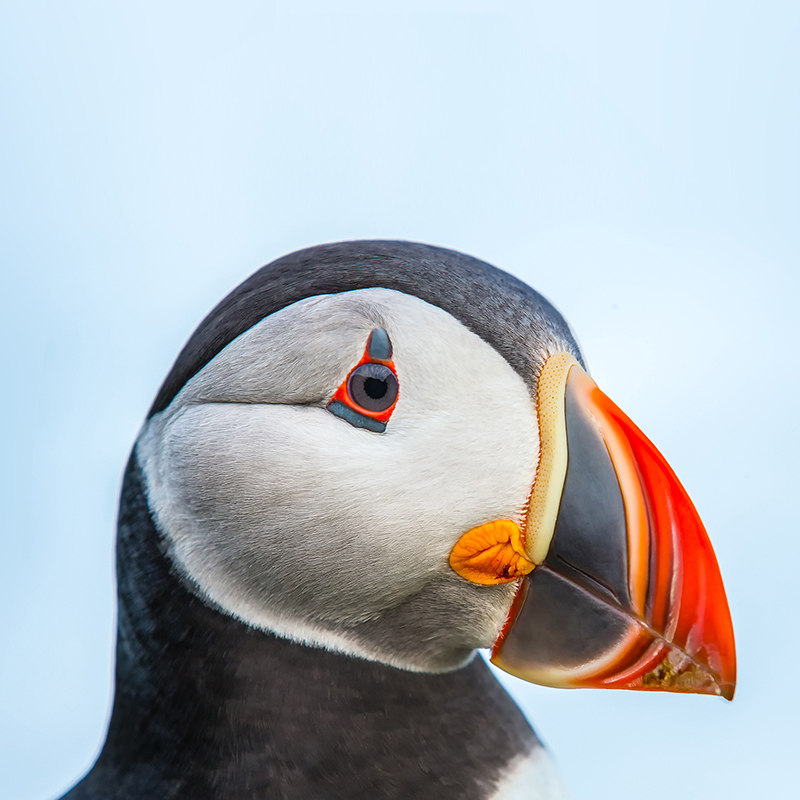

In [34]:
if __name__ == "__main__":
    main()

###NOW MAKING THE IMAGE BLURRED

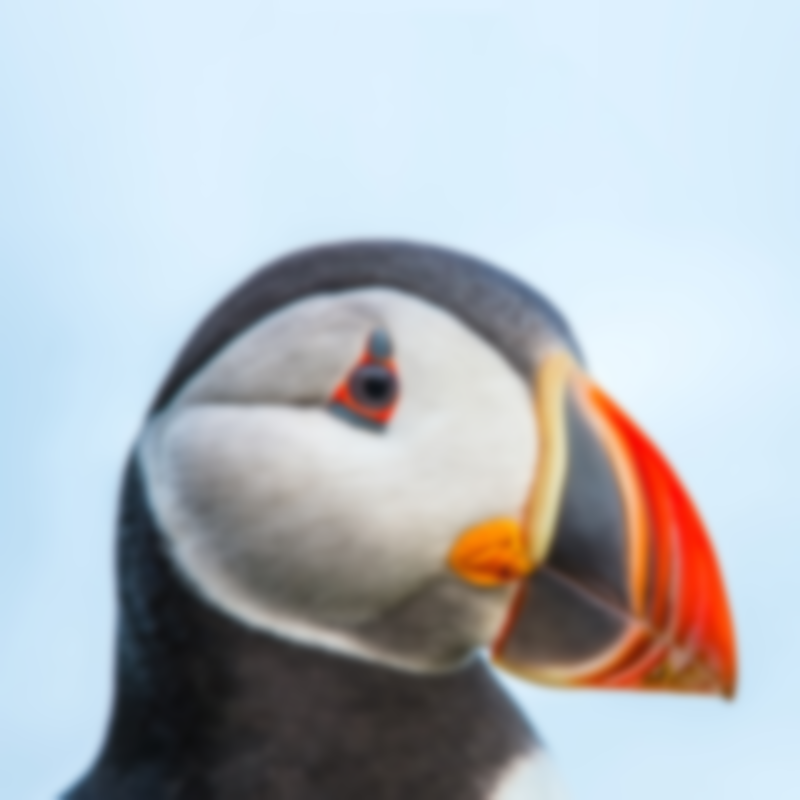

In [35]:
import cv2
from google.colab.patches import cv2_imshow

def main():
    img = cv2.imread("puff.jpeg")
    blurred = cv2.GaussianBlur(img, (27, 27), 0)
    cv2.imwrite('sub.jpg', blurred)
    cv2_imshow(blurred)
    cv2.waitKey(0)

if __name__ == "__main__":
    main()

### CONTOURS DETECTION FOR THE FOLLOWING IMAGE

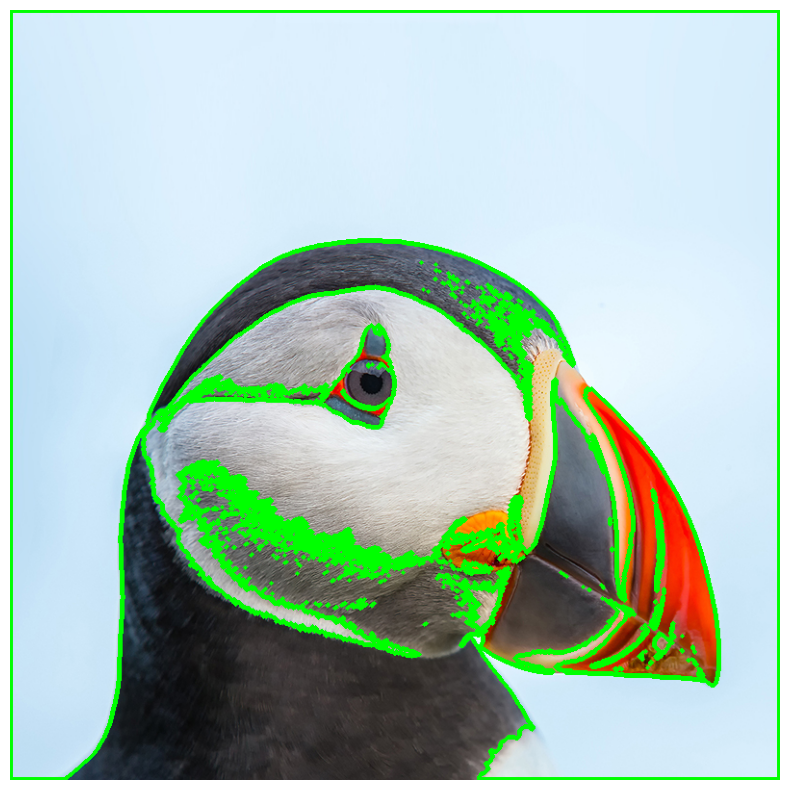

In [46]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('puff.jpeg')
gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 140, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=[10, 10])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


### CANNY EDGE DETECTION ON IMAGE

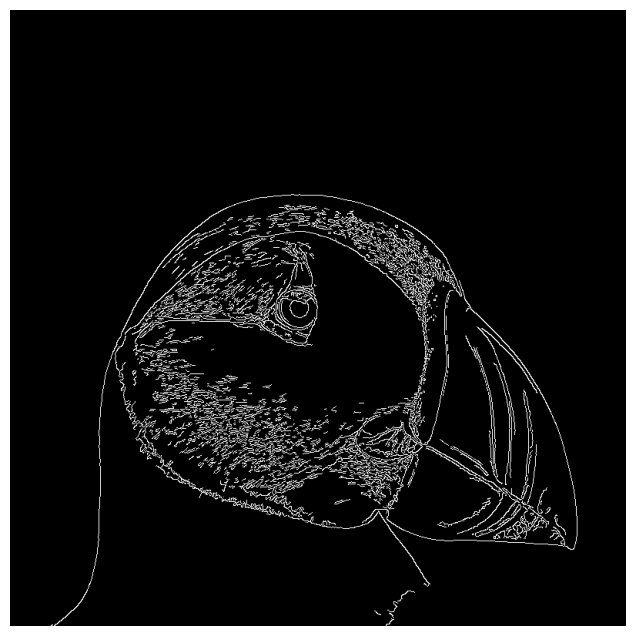

In [48]:

# Read the image
img = cv2.imread('puff.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Display the Canny edge image
plt.figure(figsize=[8, 8])
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.show()


### CREATING A FUNCTION WHICH TAKES USER INPUT AND GENREATES BLURRED, CONTOURS AND CANNY EDGE DETECTION IMAGE WHERE THE OUTPUT IS STORED IN LOCAL SYSTEM

In [51]:
#importing necessary libraries

import cv2.
import matplotlib.pyplot as plt
from google.colab import files
import os
import io
import numpy as np


def process_uploaded_image(uploaded_image, output_directory):

    # Convert the string content to a byte buffer
    img_byte_buffer = io.BytesIO(uploaded_image) #This is done so that image content can be decoded by OpenCV.

    # Read the uploaded image
    img = cv2.imdecode(np.frombuffer(img_byte_buffer.getvalue(), dtype=np.uint8), cv2.IMREAD_COLOR)

    # Canny edge detection
    edges = cv2.Canny(img, threshold1=100, threshold2=200)

    # Blurring the image
    blurred = cv2.GaussianBlur(img, (27, 27), 0)

    # Contour detection
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_img, 140, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 3)

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Save the processed images
    cv2.imwrite(os.path.join(output_directory, 'canny_edge.png'), edges)
    cv2.imwrite(os.path.join(output_directory, 'blurred_image.png'), blurred)
    cv2.imwrite(os.path.join(output_directory, 'contour_detection.png'), img_with_contours)
    print("Images saved successfully!")

# Upload the image
uploaded = files.upload()

# Process the uploaded image and save to 'img_output' folder
output_directory = 'img_output'
for image_name, image_content in uploaded.items():
    print("Processing:", image_name)
    process_uploaded_image(image_content, output_directory)


Saving camm.jpeg to camm.jpeg
Processing: camm.jpeg
Images saved successfully!


###DETECTING DOMINANT COLOR OF THE IMAGE

In [97]:
import cv2
import numpy as np
from google.colab import files

# Color names and their corresponding HSV(Hue, saturation, value) ranges
color_names = {
    "red": ([0, 70, 50], [10, 255, 255]),
    "orange": ([10, 70, 50], [25, 255, 255]),
    "yellow": ([25, 70, 50], [35, 255, 255]),
    "green": ([35, 70, 50], [80, 255, 255]),
    "blue": ([80, 70, 50], [130, 255, 255]),
    "purple": ([130, 70, 50], [160, 255, 255]),
    "pink": ([160, 70, 50], [180, 255, 255]),
    "brown": ([0, 30, 20], [20, 255, 200]),
    "gray": ([0, 0, 100], [180, 50, 255]),
    "white": ([0, 0, 200], [180, 30, 255]),
    "black": ([0, 0, 0], [180, 255, 30]),
}

def bgr_to_color_name(bgr_color):
    # Convert BGR to HSV
    hsv_color = cv2.cvtColor(np.uint8([[bgr_color]]), cv2.COLOR_BGR2HSV)[0][0]

    # Map the color to its name
    color_name = "unknown"
    for name, (lower_bound, upper_bound) in color_names.items():
        lower_bound = np.array(lower_bound, dtype=np.uint8)
        upper_bound = np.array(upper_bound, dtype=np.uint8)
        if cv2.inRange(hsv_color, lower_bound, upper_bound).all():
            color_name = name
            break

    return color_name

if __name__ == "__main__":
    # Upload the image using files.upload()
    uploaded_images = files.upload()

    # Assuming only one image is uploaded, get its file name
    image_filename = list(uploaded_images.keys())[0]

    # Read the uploaded image
    img = cv2.imread(image_filename, cv2.IMREAD_UNCHANGED)
    if img is None:
        print("Error: Could not load the image.")
    else:
        data = np.reshape(img, (-1, 3))
        data = np.float32(data)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        flags = cv2.KMEANS_RANDOM_CENTERS
        compactness, labels, centers = cv2.kmeans(data, 1, None, criteria, 10, flags)

        # Convert BGR to color name
        dominant_color = centers[0].astype(np.int32)
        color_name = bgr_to_color_name(dominant_color)
        print('\n')
        print('Dominant color is:', color_name)


Saving red.jpg to red (1).jpg


Dominant color is: red
